<a href="https://colab.research.google.com/github/lorrancmlopes/VisComp/blob/main/VisComp_Class_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class 1: Introduction

## Preliminaries

Run the cell below to download the course library and class resources.

In [1]:
import gdown

gdown.download(id='1SzvuBYIZ407c9eOChXD48NG94v7azJby')
gdown.download(id='10XqohEok0TYiWnJCzW0Ok35Lx8y39mKd')

!unzip -o '01.zip'
!rm '01.zip'

Downloading...
From (original): https://drive.google.com/uc?id=1SzvuBYIZ407c9eOChXD48NG94v7azJby
From (redirected): https://drive.google.com/uc?id=1SzvuBYIZ407c9eOChXD48NG94v7azJby&confirm=t&uuid=330b4404-fe24-46b6-9499-62327025bb85
To: /content/sdx.py
100%|██████████| 2.83k/2.83k [00:00<00:00, 7.38MB/s]
Downloading...
From: https://drive.google.com/uc?id=10XqohEok0TYiWnJCzW0Ok35Lx8y39mKd
To: /content/01.zip
100%|██████████| 275k/275k [00:00<00:00, 38.8MB/s]

Archive:  01.zip
  inflating: insper.png              
  inflating: insper-dark.png         
  inflating: insper-diff.png         
  inflating: template.png            


Run the cell below to import the class modules.

If you get import warnings, try using **`Ctrl+M .`** to restart the kernel. *(notice there is a dot there)*

In [2]:
import numpy as np
import cv2 as cv

from sdx import *

## Loading and displaying images

To load an image, we can call the `cv_imread` function, passing the file path. This path is relative to the `/content` folder. *(the folder displayed in the sidebar when you click on the folder.png tab for the first time)*

To display this image, we can call the `cv_imshow` function, passing the object returned by `cv_imread`.

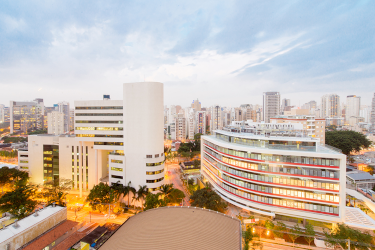

In [3]:
image = cv_imread('insper.png')

cv_imshow(image)

## Converting color images to gray level images

The image is in color, but, for simplicity, we will focus on gray level images for now. We will consider color images in future classes.

To convert a color image to a gray level image, we can call the `cv.cvtColor` function, passing the image and the constant `cv.COLOR_BGR2GRAY`.

This function actually returns a second, new image. However, since there will be no use for the original, we will overwrite the same variable.

In [ ]:
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

cv_imshow(image)

For convenience, we can call the `cv_grayread` function to load an image and convert it to gray level in a single call.

In [ ]:
dark = cv_grayread('insper-dark.png')

cv_imshow(dark)

## Understanding images as arrays

As mentioned in the briefing, raster images can be interpreted as arrays of integers. In fact, the object returned by `cv_imread` is a NumPy array. We can confirm that by running the cell below.

In [ ]:
image

The first dimension of this array represents the image height and the second represents the width.

This is somewhat counterintuitive, since you are probably more used to *WIDTHxHEIGHT* than *HEIGHTxWIDTH,* but you must get used to it.

In [ ]:
height, width = image.shape

print(f'{height}x{width}')

And yes, this means that, to access the integer in horizontal position `x` and vertical position `y`, we actually need to write `image[y, x]`.

To make this somewhat more intuitive, we will usually refer to these positions as "row" and "column". This fits well with the fact that the row indices are counted from the top.

In [ ]:
y = 100
x = 200

image[y, x] # integer in row 100 (from top to bottom) and column 200 (from left to right)

As you can see in the output above, pixels in gray level images are integers. More specifically, they are integers between `0` and `255` (inclusive). You can think of each pixel as a representation of brightness: the higher the value, the brighter the pixel.

This means that a value of `0` represents pure black and a value of `255` represents pure white.

## Activity 1: average brightness

Also in the briefing, we summarized computer vision as "extracting high-level information from digital images".

So let's try to extract a very simple high-level information: **whether the image is dark or bright**.

Write a function that receives an image (represented by a NumPy array, as seen above) and returns a string. More specifically:

* the function should iterate over all pixels and calculate their average;

* if this average is below `128`, it should return `'dark'`;

* otherwise, should return `'bright'`.

Check the output of this function for the `image` and `dark` images.

In [ ]:
def dark_or_bright(image):
    return '' # replace this line with your code

In [ ]:
dark_or_bright(image)

In [ ]:
dark_or_bright(dark)

**Observation:** We are using an ordinary loop for didactic purposes. A more efficient solution would be simply calling the `image.mean` method. When working with NumPy arrays, it is recommended to use native methods instead of ordinary loops whenever possible.

## Drawing shapes in images

The information above, "whether the image is dark or bright", is simple enough to be represented by a string. When the information of interest is more complex, it can be useful to display it on the image itself.

For example, if we want to find out "where are the male faces in the image", this can be displayed as squares drawn around these faces.

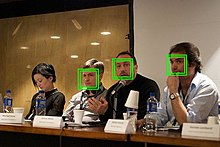

To support this purpose, OpenCV provides functions for drawing basic shapes on images.

In the example below, we draw a green square in an arbitrary location of the image.

In [ ]:
# The left-top position of the square. We want it
# to start in column 200 and row 100 of the image.
# Yes, for this function, the traditional (x, y)
# order applies. Because consistency is for losers.
left_top = (200, 100)

# The right-bottom position of the square. We want
# it to have a 50x50 size, so we sum 50 to both.
right_bottom = (250, 150)

# The color of the square, represented as a triple
# of integers between 0 and 255. This triple, in
# particular, represents pure green. We will discuss
# more about color representation in future classes.
color = (0, 255, 0)

# The thickness of the square, in pixels. A minimum
# value of two is recommended to ensure visibility.
thickness = 2

# The drawing functions do not create new images, so
# we will make a copy to avoid losing the original.
output_image = image.copy()

cv.rectangle(output_image, left_top, right_bottom, color, thickness)

cv_imshow(output_image)

Oops, did I say green? We cannot draw green squares in gray level images, obviously...

To convert a gray level image back to a color image, we can call the `cv.cvtColor` function again, but this time passing the constant `cv.COLOR_GRAY2BGR`.

Afterwards, we can simply call `cv.rectangle` again with the same parameters.

In [ ]:
output_image = cv.cvtColor(image, cv.COLOR_GRAY2BGR)

cv.rectangle(output_image, left_top, right_bottom, color, thickness)

cv_imshow(output_image)

## Activity 2: template matching

We are not ready to find human faces yet, so let's try something simpler: find a given building.

In [ ]:
template = cv_imread('template.png')

cv_imshow(template)

Write code to:

* convert the template to a gray level image;

* find the location of this template in the image;

* indicate this location with a rectangle.

You will need to iterate over all possible positions of the image where the template might be and, for each of these positions, make a pixel by pixel comparison. **Yes, this might mean writing four nested loops**. But, to make things easier, you can make exact pixel comparisons with `==`.

### Challenge 2a

Write a solution with as few loops as possible. Feel free to Google for NumPy tricks.

### Challenge 2b

Write a solution that also works for the image below. It looks like the same image, but it's not.

In [ ]:
diff = cv_grayread('insper-diff.png')

cv_imshow(diff)

### Answer

In [ ]:
# write your code here

You can click on the toc.png tab to the left to browse by section.